In [1]:
import math
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
%matplotlib inline


def generateODE(t, y):
    # Unpack the variables from the y vector
    m0, m1, m2, m3, m4, C = y
    
    g = 1.48
    k_g = np.exp(3.41)  # mum/min
    k_j2 = 0.027
    k_j1 = np.exp(24.71)  # no./(m^3 min)
    rho_c = 1568e3  # g/m^3
    MW = 150.13  # g/mol
    C_c = rho_c / MW  # mol/m^3
    k_v = np.pi / 6

    # Calculate temperature T
    T = 45 - (20) * ((t / 240) **(1/3))

    # Calculate other necessary quantities based on y and T
    
    C_sat = (5e-5 * T ** 2) - (1e-3 * T) + 0.0236    # g/g sol
    delta_C = max(C - C_sat, 0)

    G = k_g * (delta_C / C_sat) ** g       # mum/min
    B = k_j1 * (C / C_sat) * np.exp((-k_j2) * ((np.log(C_c / (C_sat * 1e6 / MW))) ** 3) / ((np.log(C / C_sat)) ** 2))  # #/m^3.min

    # Define your differential equations using y, C, T, and other quantities
    dm0 = B
    dm1 = (G * m0) + (B * 0)
    dm2 = 2 * G * m1 + (B * 0)
    dm3 = 3 * G * m2 + (B * 0)
    dm4 = 4 * G * m3 + (B * 0)
    dC = -3 * rho_c * G * k_v * m2 * (1e-18 / 1e6) - (rho_c * k_v * B * 0)
   
    return [dm0, dm1, dm2, dm3, dm4, dC]

# Initial conditions
initialConditions = [0, 0, 0, 0, 0, 0.0735]

# Parameters
# Define your parameters here

t_span = (0, 240)
num_points = 240

sol = solve_ivp(
    lambda t, y: generateODE(t, y),
    t_span,
    initialConditions,
    t_eval=np.linspace(0, 240, num_points)
)

Text(0, 0.5, 'zeroth moment')

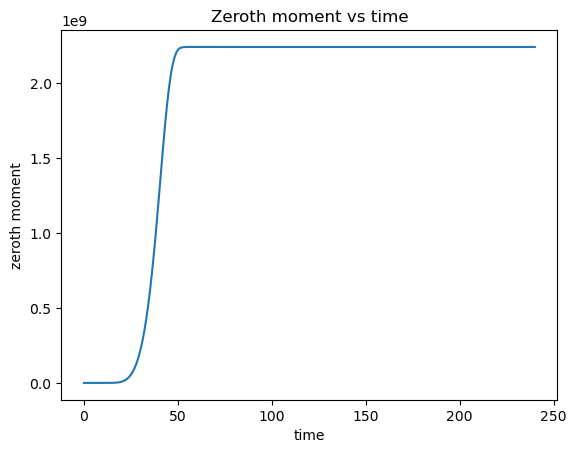

In [2]:
plt.plot(sol.t,sol.y[0])
plt.title("Zeroth moment vs time")
plt.xlabel("time")
plt.ylabel("zeroth moment")

Text(0, 0.5, '1st moment')

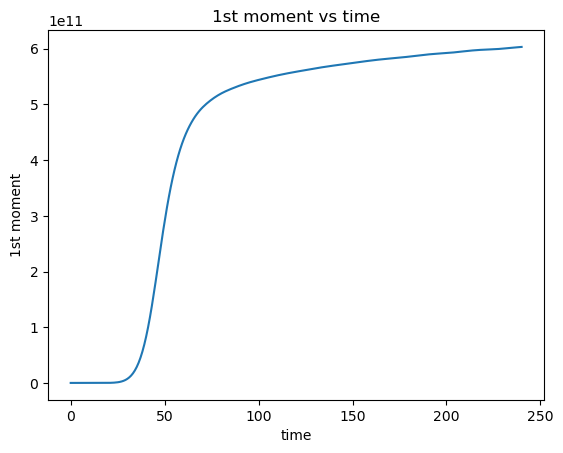

In [3]:
plt.plot(sol.t,sol.y[1])
plt.title("1st moment vs time")
plt.xlabel("time")
plt.ylabel("1st moment")

Text(0, 0.5, '2nd moment')

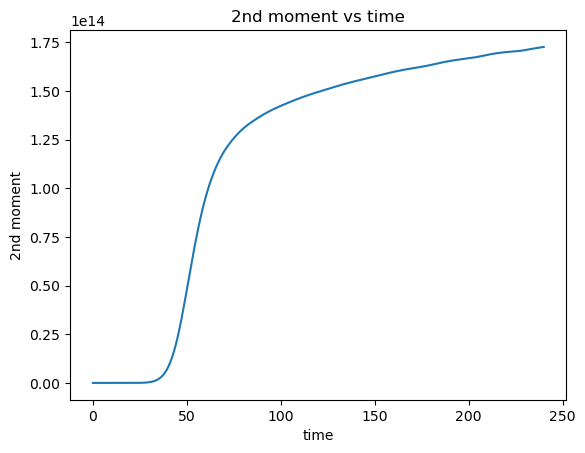

In [4]:
plt.plot(sol.t,sol.y[2])
plt.title("2nd moment vs time")
plt.xlabel("time")
plt.ylabel("2nd moment")

Text(0, 0.5, '3rd moment')

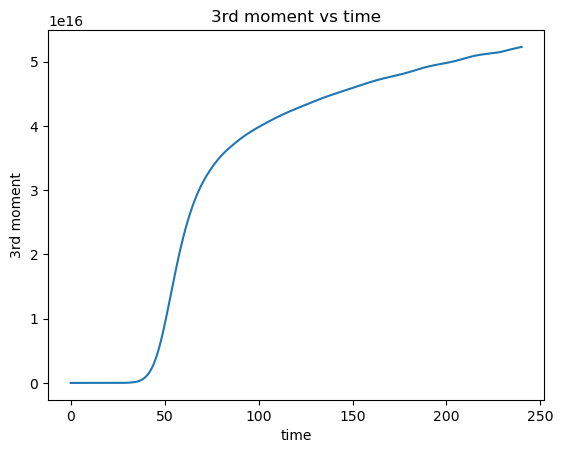

In [5]:
plt.plot(sol.t,sol.y[3])
plt.title("3rd moment vs time")
plt.xlabel("time")
plt.ylabel("3rd moment")

Text(0, 0.5, '4th moment')

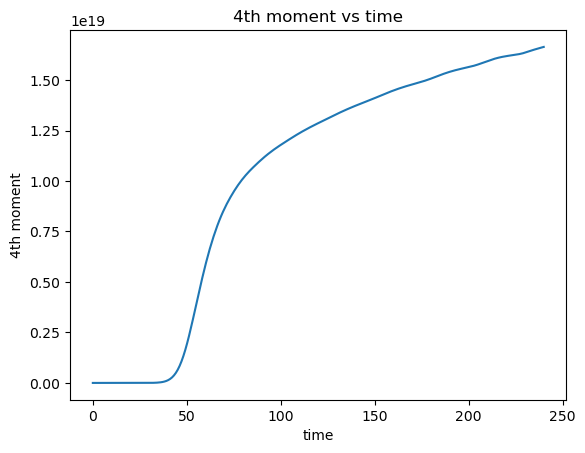

In [6]:
plt.plot(sol.t,sol.y[4])
plt.title("4th moment vs time")
plt.xlabel("time")
plt.ylabel("4th moment")

Text(0, 0.5, 'concentration g/g water')

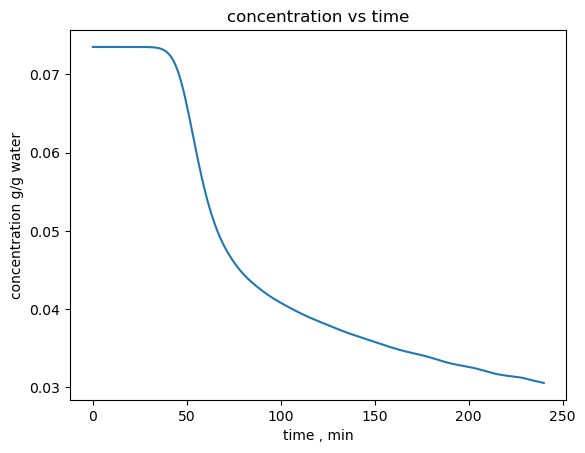

In [7]:
plt.plot(sol.t,sol.y[5])
plt.title("concentration vs time")
plt.xlabel("time , min")
plt.ylabel("concentration g/g water")